In [ ]:
# Instalando biblioteca de acesso a API do Twitter
#!pip install --upgrade  tweepy

In [34]:
# Importando biblioteca de acesso a API do Twitter

import tweepy as tw
#tw.__version__

In [42]:
# Autenticando na API do Twitter

# Dados de Autenticação
# Caso ainda não tenha acesso a API do Twitter acesse essa página:
# https://developer.twitter.com/en/docs/twitter-api/getting-started/getting-access-to-the-twitter-api
bearer_token = '' # Insira aqui seu Bearer Token

# Autenticando
client = tw.Client(bearer_token)

In [ ]:
# Configurando a Pesquisa
query = "(brasil OR (selecao brasileira)) (copa do mundo)  lang:pt"
data_inicio = "2022-10-9 00:00:00"
data_fim = "2022-10-10 23:59:59"

# Função para converter as datas para o formato esperado pela API do Tweet
import pytz
import datetime

def converteData(data):
    # Formato esperado de data "2000-1-1 12:00:00"
    local_time = pytz.timezone("America/Sao_Paulo")
    utc_data = local_time.localize(datetime.datetime.strptime(data, "%Y-%m-%d %H:%M:%S"), is_dst=None).astimezone(pytz.utc)
    dtformat = '%Y-%m-%dT%H:%M:%SZ'
    time = datetime.datetime.utcnow()
    return utc_data.strftime(dtformat)

In [ ]:
# Extraindo os Tweets

response_tweets = client.search_recent_tweets(query, max_results=100,start_time=converteData(data_inicio), end_time=converteData(data_fim),
                                       user_fields=['id'], expansions=['author_id'], tweet_fields=['created_at'])
print(response_tweets)

Response(data=[<Tweet id=1579668079763943426 text='RT @giovanafagund3s: Copa do mundo depois do Lula eleito é tudo o que eu preciso pra poder voltar a gostar da bandeira do Brasil'>, <Tweet id=1579668015314264067 text='♫ BRASIL ATROPELA GANA COM 2 DO RICHARLISON! | Paródia Iphone Branco - Borges (FUTPARÓDIAS)\nUma paródia de futebol da música "Iphone branco" do Borges. Brasil amassou Gana no penúltimo jogo antes da Copa do Mundo!\nhttps://t.co/O29HiktQm6'>, <Tweet id=1579667979297787907 text='RT @giovanafagund3s: Copa do mundo depois do Lula eleito é tudo o que eu preciso pra poder voltar a gostar da bandeira do Brasil'>, <Tweet id=1579667965066498049 text='RT @giovanafagund3s: Copa do mundo depois do Lula eleito é tudo o que eu preciso pra poder voltar a gostar da bandeira do Brasil'>, <Tweet id=1579667883193663488 text='RT @futebol_info: Em clima de Copa do Mundo, torcedores pintam Casimiro Miguel com a camisa do Brasil em rua do Rio de Janeiro.\n\n📸 Reproduç…'>, <Tweet id=1579667483

In [ ]:
import pandas as pd
# Convertendo a saída em Dataframe para melhor visualização

df_tweets_extraidos = pd.DataFrame.from_dict(response_tweets.data)
df_tweets_extraidos

,author_id,created_at,edit_history_tweet_ids,id,text
0,1432758366032564227,2022-10-11 02:59:53+00:00,[1579668079763943426],1579668079763943426,RT @giovanafagund3s: Copa do mundo depois do L...
1,1300759111076900867,2022-10-11 02:59:38+00:00,[1579668015314264067],1579668015314264067,♫ BRASIL ATROPELA GANA COM 2 DO RICHARLISON! |...
2,1500756628567728128,2022-10-11 02:59:29+00:00,[1579667979297787907],1579667979297787907,RT @giovanafagund3s: Copa do mundo depois do L...
3,1270014138237046784,2022-10-11 02:59:26+00:00,[1579667965066498049],1579667965066498049,RT @giovanafagund3s: Copa do mundo depois do L...
4,1006210819133181952,2022-10-11 02:59:06+00:00,[1579667883193663488],1579667883193663488,"RT @futebol_info: Em clima de Copa do Mundo, t..."
...,...,...,...,...,...
95,390185632,2022-10-11 02:28:31+00:00,[1579660185999904769],1579660185999904769,"RT @futebol_info: Em clima de Copa do Mundo, t..."
96,1260575727205994497,2022-10-11 02:28:08+00:00,[1579660087437971456],1579660087437971456,RT @giovanafagund3s: Copa do mundo depois do L...
97,383891360,2022-10-11 02:27:40+00:00,[1579659972878962688],1579659972878962688,RT @giovanafagund3s: Copa do mundo depois do L...
98,1196595110349283329,2022-10-11 02:27:14+00:00,[1579659862992359424],1579659862992359424,RT @giovanafagund3s: Copa do mundo depois do L...


In [ ]:
# Contagem dos Tweets disponiveis na query pesquisada
response_contagem = client.get_recent_tweets_count(query, start_time=converteData(data_inicio), end_time=converteData(data_fim), granularity="day")

print('Quantidade de Tweets:' + str(response_contagem.meta['total_tweet_count']))

Quantidade de Tweets:6848


In [ ]:
# Para obter todos os Tweets iremos utilizar o Token para a pagina seguinte

print(response_tweets.meta['next_token'])

b26v89c19zqg8o3fpzbnglsazr0c9acm1iwwpbxnroubh


In [ ]:
data = []

# Gravando os Tweets coletados na primeira pagina
for tweet in response_tweets.data:
        data.append([tweet.author_id, tweet.created_at, tweet.edit_history_tweet_ids, tweet.id, tweet.text])

# Iterando enquanto houver mais resultados disponiveis, ou seja, uma proxima pagina        
while ("next_token" in response_tweets.meta):
    response_tweets = client.search_recent_tweets(query, next_token=response_tweets.meta['next_token'], max_results=100,
                                           start_time=converteData(data_inicio), end_time=converteData(data_fim),user_fields=['id'], 
                                           expansions=['author_id'], tweet_fields=['created_at'])
    for tweet in response_tweets.data:
        data.append([tweet.author_id, tweet.created_at, tweet.edit_history_tweet_ids, tweet.id, tweet.text])

df_tweets = pd.DataFrame(data, columns = ['author_id','created_at','edit_history_tweet_ids','id','text'])
df_tweets

,author_id,created_at,edit_history_tweet_ids,id,text
0,1432758366032564227,2022-10-11 02:59:53+00:00,[1579668079763943426],1579668079763943426,RT @giovanafagund3s: Copa do mundo depois do L...
1,1300759111076900867,2022-10-11 02:59:38+00:00,[1579668015314264067],1579668015314264067,♫ BRASIL ATROPELA GANA COM 2 DO RICHARLISON! |...
2,1500756628567728128,2022-10-11 02:59:29+00:00,[1579667979297787907],1579667979297787907,RT @giovanafagund3s: Copa do mundo depois do L...
3,1270014138237046784,2022-10-11 02:59:26+00:00,[1579667965066498049],1579667965066498049,RT @giovanafagund3s: Copa do mundo depois do L...
4,1006210819133181952,2022-10-11 02:59:06+00:00,[1579667883193663488],1579667883193663488,"RT @futebol_info: Em clima de Copa do Mundo, t..."
...,...,...,...,...,...
6799,34813236,2022-10-09 03:00:43+00:00,[1578943512837754880],1578943512837754880,RT @choquei: 🚨BRASIL: Pai chora após escola le...
6800,211385169,2022-10-09 03:00:39+00:00,[1578943497859915777],1578943497859915777,RT @choquei: 🚨BRASIL: Pai chora após escola le...
6801,988100939344211974,2022-10-09 03:00:30+00:00,[1578943458198573058],1578943458198573058,RT @choquei: 🚨BRASIL: Pai chora após escola le...
6802,632444403,2022-10-09 03:00:10+00:00,[1578943372605108225],1578943372605108225,RT @choquei: 🚨BRASIL: Pai chora após escola le...


In [38]:
# Nuvem de palavras
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
import re

# Removendo duplicatas em Tweets
df_tweets = df_tweets.drop_duplicates(subset=['text'])

# Atribundo todos os Tweets um uma só variável
tweets=df_tweets['text']
palavras_tweets=" ".join(s for s in tweets)

palavras_tweets = re.sub('copa', '', palavras_tweets, flags=re.IGNORECASE)
palavras_tweets = re.sub('mundo', '', palavras_tweets, flags=re.IGNORECASE)
palavras_tweets = re.sub('brasil', '', palavras_tweets, flags=re.IGNORECASE)

palavras_tweets


'RT @Libertadores: 🔴⚫ ¡David Luiz, con @Flamengo en el corazón!\n\n🔜🏆 Cada vez falta menos para la gran Final de la CONMEBOL #Libertadores. ht… RT @Sociofla2021: "Ain o Flamengo ainda não garantiu vaga para Libertadores de 23"\nF.O.D.A-SE!\nESTAMOS NA FINAL DA LIBERTADORES DE 22!!!\nCa… @ferinwonderland @matcrfzx @Breno96969841 @antonio123513 @futebol_info @GoalBR @simpraisa teve palmeirense aqui no tt comemorando que não ia enfrentar o flamengo na final da libertadores \nsua torcida comemora mais esse jogo do q contra o santos que é rival de vcs cara kkkkkkkkkkkkkkkkkk RT @Sociofla2021: Tem umas loucuras de alguns que vc olha e vê que o perfil só pode ser de garoto de 13 anos! Porra o Flamengo pega nas qua… RT @LibertadoresBR: ❤️🖤 Te vejo em Guayaquil!\n\n📸 David Luiz, experiência e carisma pelo @Flamengo na final da CONMEBOL #Libertadores.\n\n🔜🇪🇨… RT @ColunadoFla: FLAMENGO x CORINTHIANS! 🆚\n\nEm entrevista ao #PODFLA, Arthur Muhlenberg comentou sobre aposta feita em 2010, nas oitavas

In [39]:
    # Configurando as StopWords

stop_word_ptbr = set(STOPWORDS)
stop_word_ptbr.update(['a','as','e','o','os','meu','meus','minha','minhas','seu','sua','seus','suas','de','do','da','em','que','se','não','ele','ela','t','co','https','uma','para','na','RT', 'é', 'pra', 'todo', 'mas', 'como'])

In [40]:
# Gerando a Nuvem de Palavras
nuvem_tweets = WordCloud(stopwords=stop_word_ptbr,background_color='black',
                         width=800,height=800).generate(palavras_tweets)

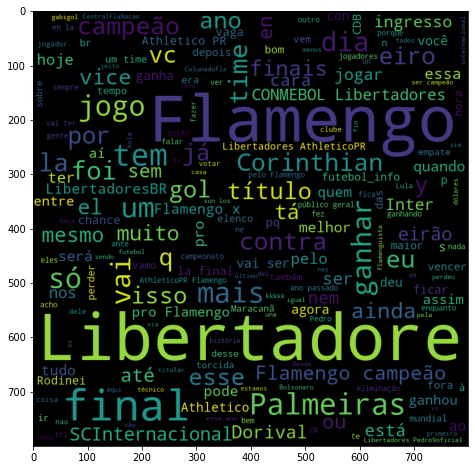

In [41]:
# Exibindo a nuvem de Palavras
import matplotlib.pyplot as plt

figura, eixo = plt.subplots(figsize=(8,8))
plt.imshow(nuvem_tweets)

In [ ]:
# Configurando a Pesquisa
query = "flamengo libertadores has:mentions"
data_inicio = "2022-10-5 00:00:00"
data_fim = "2022-10-6 23:59:59"

In [ ]:
# Contagem dos Tweets disponiveis na query pesquisada
response_contagem = client.get_recent_tweets_count(query, start_time=converteData(data_inicio), end_time=converteData(data_fim), granularity="day")

print('Quantidade de Tweets:' + str(response_contagem.meta['total_tweet_count']))

Quantidade de Tweets:3231


In [ ]:
# Requisição da primeira pagina
response_tweets = client.search_recent_tweets(query, max_results=100,start_time=converteData(data_inicio), end_time=converteData(data_fim),
                                       user_fields=['id','username'], expansions=['author_id','entities.mentions.username'], tweet_fields=['created_at'])
#response_tweets

In [ ]:
import networkx as nx

grafo = nx.DiGraph()
data = []
usuarios = [] 


# Requisição da primeira pagina
response_tweets = client.search_recent_tweets(query, max_results=100,start_time=converteData(data_inicio), end_time=converteData(data_fim),
                                       user_fields=['id','username'], expansions=['author_id','entities.mentions.username'], tweet_fields=['created_at'])

# Gravando a ID e username dos autores dos Tweets
for user in response_tweets.includes['users']:
    users_dict = {}
    users_dict[0] = user['id']
    users_dict[1] = user['username']
    usuarios.append(users_dict)

# Gravando os Tweets coletados na primeira pagina
for tweet in response_tweets.data:
        data.append([tweet.author_id, tweet.created_at, tweet.edit_history_tweet_ids, tweet.id, tweet.text])
        if "entities" in tweet:
          for mencao in tweet.entities['mentions']:            
              # Buscando o user_name do autore do Tweet
              username_autor_tweet = list(filter(lambda usuario: usuario[0] == tweet.author_id, usuarios))[0][1]
              # Criando uma aresta do autor Tweet para o(s) usuário(s) citado(s)
              grafo.add_edge(username_autor_tweet,mencao['username'])

            
            
# Iterando enquanto houver mais resultados disponiveis, ou seja, uma proxima pagina        
while ("next_token" in response_tweets.meta):
    response_tweets = client.search_recent_tweets(query, next_token=response_tweets.meta['next_token'], max_results=100,
                                           start_time=converteData(data_inicio), end_time=converteData(data_fim),user_fields=['id','username'], 
                                           expansions=['author_id','entities.mentions.username'], tweet_fields=['created_at'])
    # Gravando a ID e username dos autores dos Tweets
    for user in response_tweets.includes['users']:
        users_dict = {}
        users_dict[0] = user['id']
        users_dict[1] = user['username']
        usuarios.append(users_dict)
    
    for tweet in response_tweets.data:
        data.append([tweet.author_id, tweet.created_at, tweet.edit_history_tweet_ids, tweet.id, tweet.text])
        if "entities" in tweet:
          for mencao in tweet.entities['mentions']:            
              # Gravando a ID e username dos autores dos Tweets
              username_autor_tweet = list(filter(lambda usuario: usuario[0] == tweet.author_id, usuarios))[0][1]
              # Criando uma aresta do autor Tweet para o(s) usuário(s) citado(s)
              grafo.add_edge(username_autor_tweet,mencao['username'])

            
# Exportando o grafo para um arquivo            
nx.write_graphml_lxml(grafo, "grafo_extracao.graphml")            

df_tweets = pd.DataFrame(data, columns = ['author_id','created_at','edit_history_tweet_ids','id','text'])

In [ ]:
df_tweets

,author_id,created_at,edit_history_tweet_ids,id,text
0,1108738644607754249,2022-10-07 02:59:23+00:00,[1578218403017498624],1578218403017498624,"RT @Libertadores: 🔴⚫ ¡David Luiz, con @Flameng..."
1,1389658908361375750,2022-10-07 02:58:59+00:00,[1578218302710906881],1578218302710906881,"RT @Sociofla2021: ""Ain o Flamengo ainda não ga..."
2,1452457363164778501,2022-10-07 02:57:09+00:00,[1578217840229945344],1578217840229945344,@ferinwonderland @matcrfzx @Breno96969841 @ant...
3,1244614834655764482,2022-10-07 02:57:04+00:00,[1578217817496686592],1578217817496686592,"RT @Sociofla2021: ""Ain o Flamengo ainda não ga..."
4,1244614834655764482,2022-10-07 02:57:04+00:00,[1578217817366749184],1578217817366749184,RT @Sociofla2021: Tem umas loucuras de alguns ...
...,...,...,...,...,...
3199,1137739408134868992,2022-10-05 03:03:23+00:00,[1577494631813636097],1577494631813636097,RT @cahemota: O @ericfaria74 encontrou em Doha...
3200,279858655,2022-10-05 03:03:02+00:00,[1577494544706580480],1577494544706580480,RT @futnostalgico: Cavada do Montillo 🔥\n\nU. ...
3201,3374631719,2022-10-05 03:02:12+00:00,[1577494335104466946],1577494335104466946,RT @_rodrigomattos_: Conmebol boicota suas fin...
3202,1086703953310564352,2022-10-05 03:00:56+00:00,[1577494014328201216],1577494014328201216,@LDDflaSantiago1 @Vessoni Tenho mais medo do j...
